In [1]:
# # https://www.properati.com.ar/data
# ! wget -O ar_properties.csv.gz -q https://storage.googleapis.com/properati-data-public/ar_properties.csv.gz
# ! gzip -d -f /content/ar_properties.csv.gz

In [2]:
import pandas as pd
import numpy as np

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns


from pprint import pprint

# Lectura de datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# ! gzip -d -f /content/drive/MyDrive/ar_properties.csv.gz

In [7]:
# df = pd.read_csv('/content/drive/MyDrive/ar_properties.csv', index_col="id")  
df = pd.read_csv('/content/drive/MyDrive/inmoblimpio.csv', index_col="id")

In [8]:
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
hjHZd/BZqSBy3zb+RrqPYg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.638910,-58.476073,Argentina,Capital Federal,Floresta,NaN,...,NaN,372.0,NaN,450000.0,USD,Mensual,Exclente lote !!,"Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...",Lote,Venta
2KF4gGpEVoyqnMVFBcF7IA==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.562124,-58.464449,Argentina,Capital Federal,Belgrano,NaN,...,NaN,NaN,NaN,20000.0,USD,Mensual,Excelente cochera fija y cubierta en edificio ...,"Muy buena cochera, en el 4to piso en excelente...",Cochera,Venta
BRbo9ohkAnogBN3vgcbh1Q==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.598112,-58.400784,Argentina,Capital Federal,Recoleta,NaN,...,3.0,265.0,265.0,600000.0,USD,Mensual,Oficina comercial · 265m² · 2 Cochera,Gran Oportunidad! Unica piso de oficinas de 26...,Oficina,Venta
twX40kvJoG1MI6LVXnRKpA==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.614123,-58.378985,Argentina,Capital Federal,Monserrat,NaN,...,3.0,150.0,150.0,195000.0,USD,Mensual,Importante Oficina en Micro centro de 150 m2.,Importante Oficina de de 150 m2 con palier pr...,Oficina,Venta
+KGGxikZuWylLGEfAS1QQQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.603233,-58.385218,Argentina,Capital Federal,San Nicolás,NaN,...,1.0,NaN,12.0,22000.0,USD,Mensual,Oficina - San Nicolas,VENTA DE OFICINA A METROS DEL PALACIO DE TRIBU...,Oficina,Venta


<h1> Análisis del conjunto de datos
 <h2> Parte 1 PreProcesamiento.

In [9]:
df.shape

(175149, 24)

In [10]:
df.columns

Index(['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1',
       'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, hjHZd/BZqSBy3zb+RrqPYg== to fJLVUIziPl31ACoaE/fj1g==
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          175149 non-null  object 
 1   start_date       175149 non-null  object 
 2   end_date         175149 non-null  object 
 3   created_on       175149 non-null  object 
 4   lat              165257 non-null  float64
 5   lon              165257 non-null  float64
 6   l1               175149 non-null  object 
 7   l2               175149 non-null  object 
 8   l3               175149 non-null  object 
 9   l4               8615 non-null    object 
 10  l5               0 non-null       float64
 11  l6               0 non-null       float64
 12  rooms            148869 non-null  float64
 13  bedrooms         128525 non-null  float64
 14  bathrooms        153305 non-null  float64
 15  surface_total    117880 non-null  float64
 16  su

Primeras concluciones:

---


 

*   l6 no tiene informacion, se dropea.
*   hay un 10% del database sin lat y long puede evaluarse tirar las filas sin esa info.
*   **Mas importante hay una parte del databse sin precio, eso se tira seguro.**

---
A nivel operativo las fechas hay que pasarlas a formato de fecha. <br />









En mis datos a predecir solo hay USD asique para evitar problemas de cambio de unidades voy a eleminar las que no son en USD.
Tambien es solo de argentina a predecir. <br />
EL objetivo es solo precios por lo que operaciones que no sean de comrpa tambien se van.<br />
Mis datos son solo de Capital Federal asique voy a filtrar tambien por eso.<br />
Estoy buscando precios de abril del 2022 asique en principio podria ver que precios estan viejos. Mi base de datos es de mayo 2021 asique tendre que hacer ajustes con numeros conocidos de evolución de precios.
<br />
Por ultimo, hay busco datos de barrios especificos asique lo que este por fuera solo añade ruido.

In [12]:
df.currency.value_counts()

USD    175149
Name: currency, dtype: int64

In [13]:
df=df[df.currency=='USD']

In [14]:
df=df[df.l1=='Argentina']

In [15]:
df=df[df.l2=='Capital Federal']

Estos son los barrios que vienen del set de los que quiero predecir.

In [16]:
a=['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', '2 Ambientes', 'Mataderos',
       'Villa Santa Rita', 'Parque Patricios', 'Parque Chas',
       'Villa General Mitre', 'Retiro', 'Parque Avellaneda',
       'Monte Castro', 'Parque Chacabuco', 'Villa Luro', 'Versalles',
       'Coghlan', 'Vélez Sarsfield', 'Nueva Pompeya', 'Agronomía',
       'Villa Real', 'GBA Norte']

In [17]:
df = df[df['l3'].isin(a)]

In [18]:
# df.to_csv("inmoblimpio.csv")

In [19]:
df['start_date']=pd.to_datetime(df['start_date'])

In [20]:
df['start_date'].max()

Timestamp('2021-06-17 00:00:00')

In [21]:
df['start_date'].min()

Timestamp('2020-05-24 00:00:00')

In [22]:
df['end_date'].replace('9999-12-31','2020-12-31', inplace=True)

In [23]:
df['end_date']=pd.to_datetime(df['end_date'])
df['end_date'].max()

Timestamp('2021-08-16 00:00:00')

In [24]:
df=df[df.start_date>'2021-01-01']

Hago un ajuste preliminar de la columna precios.

In [25]:
df.l3.unique()

array(['Recoleta', 'Monserrat', 'Balvanera', 'Almagro', 'Palermo',
       'San Telmo', 'San Nicolás', 'Villa Crespo', 'Flores', 'Caballito',
       'Retiro', 'Floresta', 'Monte Castro', 'Villa General Mitre',
       'Villa Urquiza', 'Parque Chacabuco', 'Belgrano', 'Barracas',
       'Boedo', 'Nuñez', 'Puerto Madero', 'Coghlan', 'Parque Chas',
       'San Cristobal', 'Villa Santa Rita', 'Villa Lugano', 'Saavedra',
       'Colegiales', 'Villa Devoto', 'Liniers', 'Boca',
       'Parque Avellaneda', 'Mataderos', 'Versalles', 'Villa Real',
       'Parque Patricios', 'Villa Ortuzar', 'Villa Luro',
       'Villa del Parque', 'Chacarita', 'Constitución', 'Paternal',
       'Agronomía'], dtype=object)

In [26]:
df.loc[df.l3 == 'Palermo', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Belgrano',['price']]=df.price*0.95
df.loc[df.l3 == 'Recoleta', ['price']]=df.price*0.87
df.loc[df.l3 ==  'Caballito',['price']]=df.price*0.93
df.loc[df.l3 == 'Villa Urquiza', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Almagro',['price']]=df.price*0.922
df.loc[df.l3 == 'Villa Crespo', ['price']]=df.price*0.824
df.loc[df.l3 ==  'Nuñez',['price']]=df.price*0.946

df.loc[df.l3 == 'Flores', ['price']]=df.price*0.94
df.loc[df.l3 ==  'Balvanera',['price']]=df.price*0.95
df.loc[df.l3 == 'Puerto Madero', ['price']]=df.price*0.96
df.loc[df.l3 ==  'Colegiales',['price']]=df.price*0.91
df.loc[df.l3 == 'Saavedra', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Villa Devoto',['price']]=df.price*0.922
df.loc[df.l3 == 'Floresta', ['price']]=df.price*0.904
df.loc[df.l3 ==  'Villa Del Parque',['price']]=df.price*0.894

df.loc[df.l3 == 'Retiro', ['price']]=df.price*0.881
df.loc[df.l3 ==  'Barracas',['price']]=df.price*1.08
df.loc[df.l3 == 'San Cristobal', ['price']]=df.price*0.811
df.loc[df.l3 ==  'San Telmo',['price']]=df.price*0.971
df.loc[df.l3 == 'Boedo', ['price']]=df.price*0.898
df.loc[df.l3 ==  'San Nicolas',['price']]=df.price*0.923
df.loc[df.l3 == 'Mataderos', ['price']]=df.price*0.806
df.loc[df.l3 ==  'Liniers',['price']]=df.price*0.854




In [27]:
df.currency.value_counts()

USD    71384
Name: currency, dtype: int64

In [28]:
df=df.drop('l6', axis=1)

In [29]:
df['price_period'].value_counts()

Mensual    42815
Name: price_period, dtype: int64

In [30]:
df.ad_type.value_counts()

Propiedad    71384
Name: ad_type, dtype: int64

Puedo tirar tambien el price period y ad type.

In [31]:
df.dropna(subset=['price','lat','lon','l3','title','description','operation_type'], inplace=True)

In [32]:
df=df.drop('price_period', axis=1)

In [33]:
df=df.drop('ad_type', axis=1)

In [34]:
df.shape

(68255, 21)

<h1>Interludio para df_pred

<h1> Análisis del conjunto de datos
 <h2> Parte 2 Analisis de datos y creación de features.
 Aca empiezo a hacer cambios en los datos, podria ya sumar lo que voy a predecir asi los concateno y despues los separo.

Modifiquemos lat y lon

In [35]:


df['rot_45_x'] = (0.707 * df['lat']) + (0.707 * df['lon'])
df['rot_45_y'] = (0.707 * df['lon']) + (0.707 * df['lat'])
df['rot_30_x'] = (0.866 * df['lat']) + (0.5 * df['lon'])
df['rot_30_y'] = (0.866 * df['lon']) + (0.5 * df['lat'])




In [36]:
df['start_date']=pd.to_datetime(df['start_date'])
df['anio_s']=pd.DatetimeIndex(df['start_date']).year
df['mes_s']=pd.DatetimeIndex(df['start_date']).month
df['end_date']=pd.to_datetime(df['end_date'])
df['anio_e']=pd.DatetimeIndex(df['end_date']).year
df['mes_e']=pd.DatetimeIndex(df['end_date']).month
df['created_on']=pd.to_datetime(df['created_on'])
df['anio_c']=pd.DatetimeIndex(df['created_on']).year
df['mes_c']=pd.DatetimeIndex(df['created_on']).month

In [37]:
# np.log(df.rooms).plot.hist()

In [38]:
df['logr']=np.log(df.rooms)

In [39]:
df.bedrooms.value_counts()

 1.0      18733
 2.0      15480
 3.0      10894
 4.0       3366
 0.0       3210
 5.0        593
 6.0        208
 7.0         51
 8.0         46
 10.0        18
 9.0         16
 12.0        14
 15.0         8
 27.0         5
 16.0         4
 20.0         4
 14.0         4
 13.0         4
 30.0         3
 24.0         3
 11.0         3
 22.0         2
 32.0         2
 39.0         2
 101.0        2
 18.0         2
 17.0         2
 33.0         1
 82.0         1
 40.0         1
 43.0         1
 36.0         1
-2.0          1
 23.0         1
 64.0         1
 34.0         1
 25.0         1
 37.0         1
 50.0         1
-1.0          1
Name: bedrooms, dtype: int64

In [40]:
# df.bedrooms = np.where(df.bedrooms < 1, 0.1, df.bedrooms)
df=df[df.bedrooms>0]

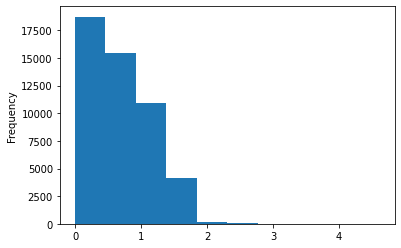

In [41]:
np.log(df.bedrooms).plot.hist()

In [42]:
df['logbed']=np.log(df.bedrooms)

In [43]:
# np.log(df.bathrooms).plot.hist()

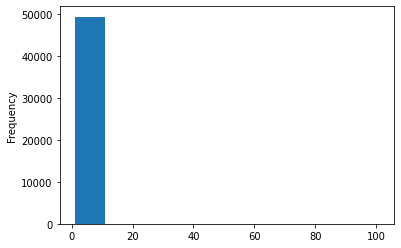

In [44]:
df.bedrooms.plot.hist()

In [45]:
df['logbath']=np.log(df.bathrooms)

In [46]:
df.shape

(49480, 34)

In [47]:
df.surface_covered.max()

123000.0

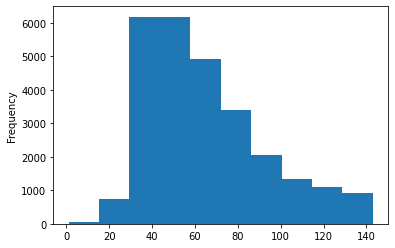

In [48]:
df.surface_covered[df.surface_covered.between(df.surface_covered.quantile(.0), df.surface_covered.quantile(.85))].plot.hist()

Limpio algunos outliers de superficie cubierta.

In [49]:
df.surface_covered.value_counts();

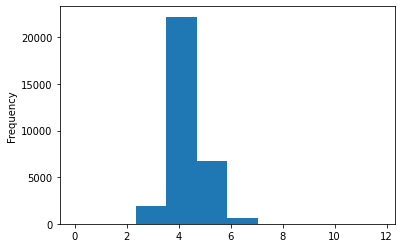

In [50]:
np.log(df.surface_covered).plot.hist()

In [51]:
df['logsupcov']=np.log(df.surface_covered)

In [52]:
df.shape

(49480, 35)

In [53]:
# df=df[df.surface_covered<df.surface_covered.quantile(.9999)]
# df.surface_covered.plot.hist()

# df.shape (405996, 24) de original (834056, 24)


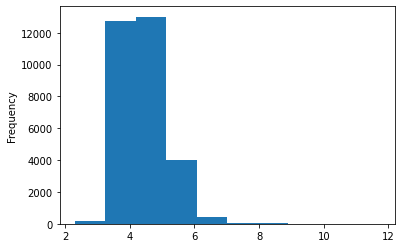

In [54]:
np.log(df.surface_total).plot.hist()

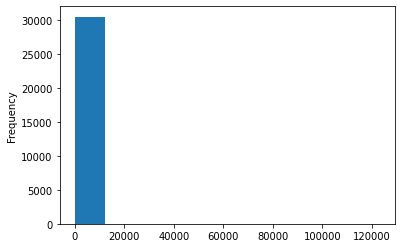

In [55]:
df.surface_total.plot.hist()

In [56]:
df['logsuptot']=np.log(df.surface_total)

In [57]:
df.l2.unique()

array(['Capital Federal'], dtype=object)

In [58]:
df.l1.unique()

array(['Argentina'], dtype=object)

In [59]:
df.l3.value_counts()

Belgrano               8837
Palermo                7552
Recoleta               3354
Caballito              3290
Villa Urquiza          2725
Almagro                1807
Villa Crespo           1595
Nuñez                  1518
Flores                 1465
Balvanera              1328
Puerto Madero          1326
Colegiales             1138
Saavedra                917
Villa Devoto            901
Floresta                803
Villa del Parque        789
Retiro                  740
Barracas                732
San Cristobal           681
San Telmo               629
Boedo                   628
San Nicolás             609
Mataderos               536
Liniers                 492
Parque Chacabuco        438
Coghlan                 430
Monserrat               430
Villa Luro              403
Villa Lugano            354
Parque Patricios        339
Chacarita               306
Villa Ortuzar           293
Monte Castro            261
Constitución            255
Paternal                240
Villa General Mitre 

In [60]:
df.property_type.unique()

array(['Departamento', 'Oficina', 'PH', 'Casa', 'Otro', 'Depósito',
       'Lote', 'Local comercial', 'Cochera', 'Casa de campo'],
      dtype=object)

In [61]:
df["Nuevo"] = df["description"].str.lower().str.contains("excel")

In [62]:
df["1am"] = df["description"].str.lower().str.contains("1 ambiente")

In [63]:
df["2am"] = df["description"].str.lower().str.contains("2 ambiente")

In [64]:
df["3am"] = df["description"].str.lower().str.contains("3 ambiente")

In [65]:
df.Nuevo.value_counts()

False    24775
True     24705
Name: Nuevo, dtype: int64

In [66]:
df['1am'].value_counts()

False    48816
True       664
Name: 1am, dtype: int64

In [67]:
df['2am'].value_counts()

False    38373
True     11107
Name: 2am, dtype: int64

In [68]:
df['3am'].value_counts()

False    38352
True     11128
Name: 3am, dtype: int64

# Tratamiento de los datos

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49480 entries, MZ5qRJ730rzfdiow7rT9Pg== to YlLn73RCQP4pM51jaWJtNg==
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date       49480 non-null  datetime64[ns]
 1   end_date         49480 non-null  datetime64[ns]
 2   created_on       49480 non-null  datetime64[ns]
 3   lat              49480 non-null  float64       
 4   lon              49480 non-null  float64       
 5   l1               49480 non-null  object        
 6   l2               49480 non-null  object        
 7   l3               49480 non-null  object        
 8   l4               1899 non-null   object        
 9   l5               0 non-null      float64       
 10  rooms            46670 non-null  float64       
 11  bedrooms         49480 non-null  float64       
 12  bathrooms        48306 non-null  float64       
 13  surface_total    30498 non-null  float64       
 14  s

In [70]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'l4', 'l5', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type', 'rot_45_x', 'rot_45_y', 'rot_30_x',
       'rot_30_y', 'anio_s', 'mes_s', 'anio_e', 'mes_e', 'anio_c', 'mes_c',
       'logr', 'logbed', 'logbath', 'logsupcov', 'logsuptot', 'Nuevo', '1am',
       '2am', '3am'],
      dtype='object')

# Modelización

In [71]:
from sklearn.model_selection import train_test_split
# Separate target from predictors
numerical_cols=['rooms', 'bedrooms', 'bathrooms']
numerical_cols2=['logsuptot', 'logsupcov']
numerical_cols3=['rot_45_x', 'rot_45_y', 'rot_30_x','rot_30_y']
categorical_cols=['l3','property_type',"Nuevo",'1am','2am','3am']
my_cols = categorical_cols + numerical_cols + numerical_cols2 + numerical_cols3
y = df.price
X = df[my_cols]
# X = df.drop(['price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)


                                                                

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [72]:
def log_transform(x):
    return np.log(x + 1)

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


# Preprocessing for numerical data
scaler = StandardScaler()
scaler2 = RobustScaler()
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.



transformer = FunctionTransformer(log_transform)
numerical_transformer = Pipeline(steps=[('numimputer', SimpleImputer(strategy='mean')),
                                        ('scaler', scaler)])
# Preprocessing for numerical data 2
numerical_transformer2 = Pipeline(steps=[('numimputer2', SimpleImputer(strategy='mean'))]
                                        )

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
         ('num2', numerical_transformer2, numerical_cols2),
        #  ('num3', numerical_transformer3, numerical_cols3),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [96]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200,max_depth=10, random_state=42, n_jobs=-1)


In [92]:
df.shape

(49480, 40)

In [98]:
from sklearn.metrics import mean_absolute_error
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# # Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# # Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = sk.model_selection.cross_val_score(my_pipeline, X_train, y=y_train, cv=4, scoring='neg_root_mean_squared_error',error_score='raise')
# score = mean_absolute_error(y_valid, preds)

print('Score:', score)

Score: [-275007.10350834 -246775.95654654 -242799.09525019 -255417.24686534]


In [99]:
score2 = mean_absolute_error(y_valid, preds)
print('Score2:', score2)

Score2: 83653.20779278832


In [100]:
import math
math.sqrt(score2)

289.22864275999416

In [101]:
corr_matrix = df.corr()

In [102]:
corr_matrix['price'].sort_values(ascending=False)

price              1.000000
logsupcov          0.532198
logsuptot          0.517566
bathrooms          0.465890
logbath            0.434976
rooms              0.413429
logr               0.388975
logbed             0.372270
bedrooms           0.327741
rot_30_x           0.161915
rot_45_y           0.150277
rot_45_x           0.150277
lat                0.129928
rot_30_y           0.129698
surface_total      0.127739
surface_covered    0.109074
lon                0.079723
Nuevo              0.031699
anio_e             0.013774
mes_s             -0.005340
mes_c             -0.005340
mes_e             -0.011752
1am               -0.039848
3am               -0.077757
2am               -0.172229
l5                      NaN
anio_s                  NaN
anio_c                  NaN
Name: price, dtype: float64

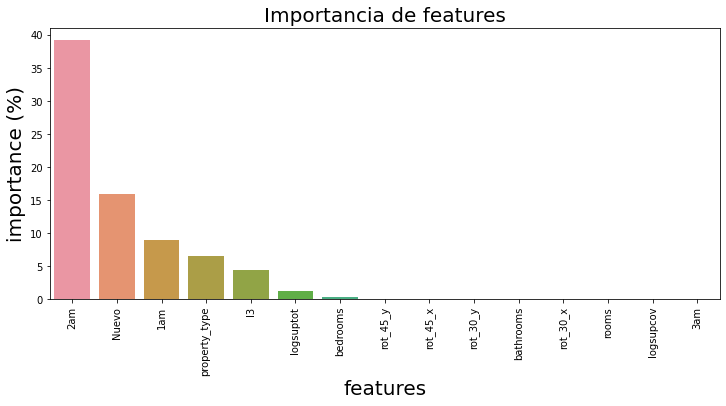

In [103]:
# columnas_2=df.columns.drop('price')
columnas_2=X.columns
columnas_2
diccionario = pd.DataFrame(list(zip(columnas_2,my_pipeline.steps[1][1].feature_importances_*100)), columns = ['features','importance (%)']);
primeros = diccionario.nlargest(40,columns=['importance (%)']);

plt.figure(figsize=(12,5))
sns.barplot(x = "features", y = "importance (%)",data = primeros)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Importancia de features', fontsize=20)
plt.xlabel('features', fontsize=20)
plt.ylabel('importance (%)', fontsize=20)
plt.show()

## Predicción para Kaggle


In [104]:
df_pred = pd.read_csv('/content/drive/MyDrive/a_predecir.csv', index_col="id")
df_pred.fillna(0, inplace=True)

In [105]:

df_pred['rot_45_x'] = (0.707 * df_pred['lat']) + (0.707 * df_pred['lon'])
df_pred['rot_45_y'] = (0.707 * df_pred['lon']) + (0.707 * df_pred['lat'])
df_pred['rot_30_x'] = (0.866 * df_pred['lat']) + (0.5 * df_pred['lon'])
df_pred['rot_30_y'] = (0.866 * df_pred['lon']) + (0.5 * df_pred['lat'])



df_pred['start_date']=pd.to_datetime(df_pred['start_date'])
df_pred['anio_s']=pd.DatetimeIndex(df_pred['start_date']).year
df_pred['mes_s']=pd.DatetimeIndex(df_pred['start_date']).month
df_pred['end_date']=pd.to_datetime(df_pred['end_date'])
df_pred['anio_e']=pd.DatetimeIndex(df_pred['end_date']).year
df_pred['mes_e']=pd.DatetimeIndex(df_pred['end_date']).month
df_pred['created_on']=pd.to_datetime(df_pred['created_on'])
df_pred['anio_c']=pd.DatetimeIndex(df_pred['created_on']).year
df_pred['mes_c']=pd.DatetimeIndex(df_pred['created_on']).month



df_pred['logr']=np.log(df_pred.rooms)
df_pred['logbed']=np.log(df_pred.bedrooms)
df_pred['logbath']=np.log(df_pred.bathrooms)
df_pred['logsupcov']=np.log(df_pred.surface_covered)
df_pred['logsuptot']=np.log(df_pred.surface_total)


df_pred["Nuevo"] = df_pred["description"].str.contains("Excel")
df_pred["1am"] = df_pred["description"].str.lower().str.contains("1 ambiente")
df_pred["2am"] = df_pred["description"].str.lower().str.contains("2 ambiente")
df_pred["3am"] = df_pred["description"].str.lower().str.contains("3 ambiente")

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [106]:
df_pred.l3.unique()

array(['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', '2 Ambientes', 'Mataderos',
       'Villa Santa Rita', 'Parque Patricios', 'Parque Chas',
       'Villa General Mitre', 'Retiro', 'Parque Avellaneda',
       'Monte Castro', 'Parque Chacabuco', 'Villa Luro', 'Versalles',
       'Coghlan', 'Vélez Sarsfield', 'Nueva Pompeya', 'Agronomía',
       'Villa Real', 'GBA Norte'], dtype=object)

In [107]:
# quedate con las mismas columnas que ar_properties
X_pred = df_pred[X.columns]

In [108]:
from sklearn import set_config
set_config(display='diagram')
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['rooms', 'bedrooms',
                                                   'bathrooms']),
                                                 ('num2',
                                                  Pipeline(steps=[('numimputer2',
                                                                   SimpleImputer())]),
                                                  ['logsuptot', 'logsupcov']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['l3', 'property_type',
                                                   'Nuevo', '1am', '2am',
                                                   '3am'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [109]:
# los mejores hiperparámetros encontrados antes
n_estimators = 200
max_depth = 10

# entrenamiento
# reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)
my_pipeline.fit(X, y)

# predicción
df_pred["price"] = my_pipeline.predict(X_pred)

In [110]:
# grabo la solución
df_pred[["price"]].to_csv("solucion.csv")